In [88]:
# Importing Libraries

# data analysis and wrangling
import numpy as np
import pandas as pd
from scipy.stats import norm, skew

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Machine Learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from scipy import stats 
from scipy.stats import zscore


# Data Loading
import os

In [32]:
# converting json file to CSV file
import json

file = pd.read_json(
    "C:\\04-AIML\\07 Unsupervised Learning\\Part1 - Car-Attributes.json"
)

# storing output file in folder
file.to_csv("C:\\04-AIML\\07 Unsupervised Learning\\output.csv")

In [33]:
# Loading dataset
os.chdir("C:\\04-AIML\\07 Unsupervised Learning")
df1 = pd.read_csv("output.csv")
df2 = pd.read_csv("Part1 - Car name.csv")

In [34]:
# Shape of the each datasets
df1.shape
df2.shape
print("df1 Shape is :", df1.shape)
print("df2 Shape is :", df2.shape)

df1 Shape is : (398, 9)
df2 Shape is : (398, 1)


In [35]:
# Size of the each datasets
df1.size
df2.size
print("df1 Size is :", df1.size)
print("df2 Size is :", df2.size)

df1 Size is : 3582
df2 Size is : 398


In [36]:
# Merge two dataframes into one
df = pd.concat([df1, df2], axis=1)

In [37]:
# Merged data shape
df.shape
print("Merge data Shape is :", df.shape)

Merge data Shape is : (398, 10)


In [38]:
# Merged data size
df.size
print("Merge data Size is :", df.size)

Merge data Size is : 3980


In [39]:
# Export final merged output file in a folder in csv format
df.to_csv('C:\\04-AIML\\07 Unsupervised Learning\\Final\\console.csv',index=False)

# Export final merged output file in a folder in xlsx format
df.to_excel('C:\\04-AIML\\07 Unsupervised Learning\\Final\\console.xlsx',index=False)

# Export final merged output file in a folder in xlsx format
df.to_json('C:\\04-AIML\\07 Unsupervised Learning\\Final\\console.json')


In [40]:
# Import final merged output file of stored folder from csv format
os.chdir("C:\\04-AIML\\07 Unsupervised Learning\\Final")
pd.read_csv("console.csv")

,Unnamed: 0,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [41]:
# Import final merged output file of stored folder from excel format
pd.read_excel("console.xlsx")

,Unnamed: 0,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [42]:
# Import final merged output file of stored folder from json format
pd.read_json("console.json")

,Unnamed: 0,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [43]:
# Checking for Datatypes
df.dtypes

Unnamed: 0      int64
mpg           float64
cyl             int64
disp          float64
hp             object
wt              int64
acc           float64
yr              int64
origin          int64
car_name       object
dtype: object

In [44]:
# Finding rows with blank
blank = pd.DataFrame(df.hp.str.isdigit())
df[blank["hp"] == False]

,Unnamed: 0,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [45]:
# Replace ? to nan
df = df.replace("?", np.nan)

In [46]:
# Convert hp attribute into float
df["hp"] = df["hp"].astype("float64")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  398 non-null    int64  
 1   mpg         398 non-null    float64
 2   cyl         398 non-null    int64  
 3   disp        398 non-null    float64
 4   hp          392 non-null    float64
 5   wt          398 non-null    int64  
 6   acc         398 non-null    float64
 7   yr          398 non-null    int64  
 8   origin      398 non-null    int64  
 9   car_name    398 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


In [48]:
# Check Missing Value
df.isnull().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            6
wt            0
acc           0
yr            0
origin        0
car_name      0
dtype: int64

In [49]:
# Fill missing value with mean
df["hp"].fillna(df["hp"].mean(), inplace=True)

In [50]:
# Check Missing Value
df.isnull().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
wt            0
acc           0
yr            0
origin        0
car_name      0
dtype: int64

In [51]:
# Headers Info
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [52]:
# Dropping Columns
df = df.drop(["Unnamed: 0"], axis=1)

In [53]:
# Dropping Columns
df = df.drop(["car_name"], axis=1)

In [54]:
# Headers Info after dropping columns
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [55]:
#creating mpg_level attribute using the 25% and 75% of mpg values( <  17 as low, > 17 and <29 as medium, > 29 as high  )
df['mpg_level'] = df['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,mpg_level
0,18.0,8,307.0,130.0,3504,12.0,70,1,medium
1,15.0,8,350.0,165.0,3693,11.5,70,1,low
2,18.0,8,318.0,150.0,3436,11.0,70,1,medium
3,16.0,8,304.0,150.0,3433,12.0,70,1,low
4,17.0,8,302.0,140.0,3449,10.5,70,1,medium


In [56]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


<AxesSubplot:>

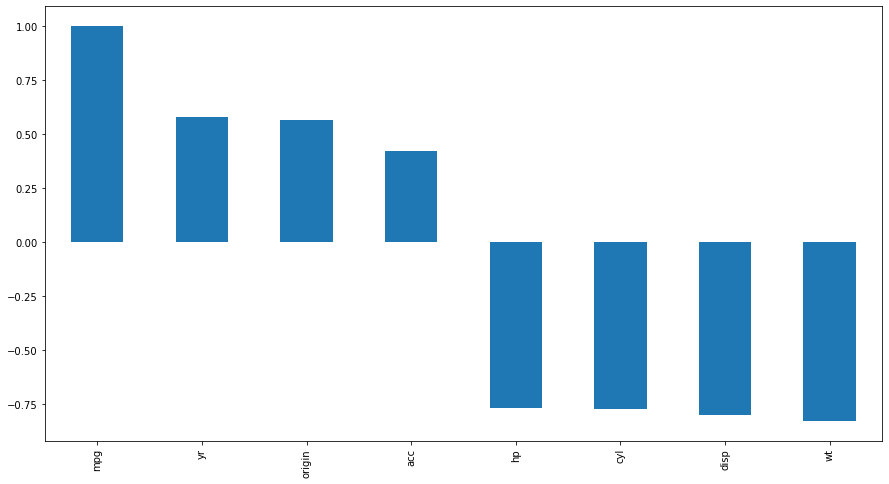

In [57]:
# Correlation of "mpg" with other variables:
plt.figure(figsize=(15, 8))
df.corr()["mpg"].sort_values(ascending=False).plot(kind="bar")

Positive Correlation Attributes to mpg
1. Yr

2. Origin

3. Acc

Negative Correlation Attributes to mpg

1.hp

2.cyl

3.disp

4.wt

In [60]:
# Correlation Matrix
cor = df.corr()
cor

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
wt,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


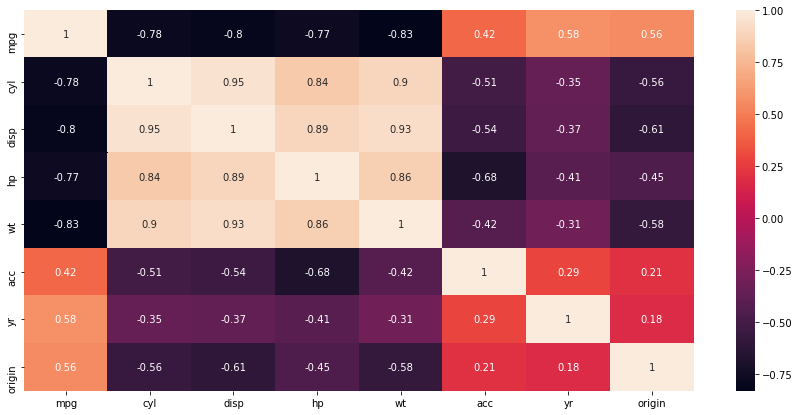

In [61]:
# Corelation matrix
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(cor, annot=True, ax=ax)
plt.show()

In [62]:
# Count of number of cars
df["yr"].value_counts().sort_values(ascending=False)

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: yr, dtype: int64

# Cylinder

Text(0.5, 1.0, 'Cylinders vs horsepower')

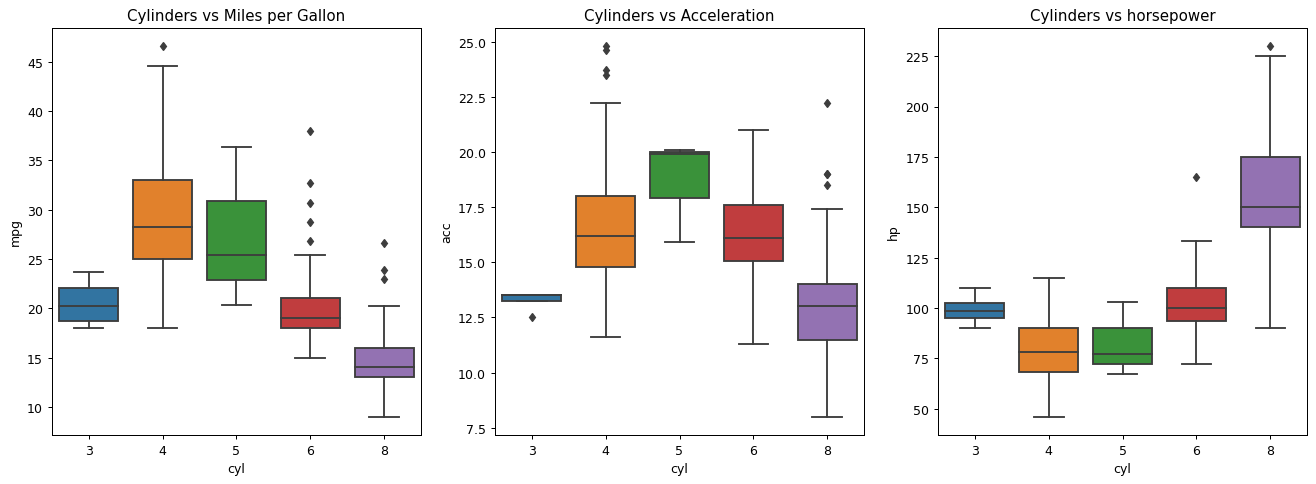

In [63]:
# Effect of Cylinder Count on Mileage, Acceleration, Horsepower

fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, dpi=90)

sns.boxplot(x="cyl", y="mpg", data=df, ax=axes[0])
axes[0].set_title("Cylinders vs Miles per Gallon")

sns.boxplot(x="cyl", y="acc", data=df, ax=axes[1])
axes[1].set_title("Cylinders vs Acceleration")

sns.boxplot(x="cyl", y="hp", data=df, ax=axes[2])
axes[2].set_title("Cylinders vs horsepower")

Cars with 4 Cylinders have highest mileage

Cars with 5 Cylinders have highest acceleration

8 Cylinder cars have higher Horsepower

# Weight

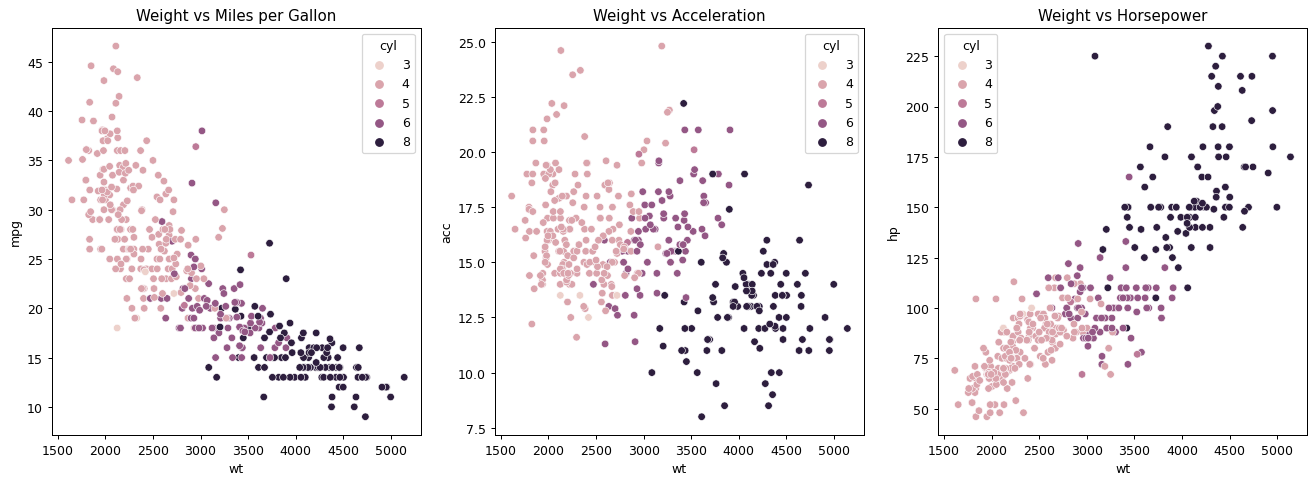

In [64]:
# Effect of Weight Count on Mileage, Acceleration, Horsepower

fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, dpi=90)

sns.scatterplot(x="wt", y="mpg", data=df, hue="cyl", ax=axes[0])
axes[0].set_title("Weight vs Miles per Gallon")

sns.scatterplot(x="wt", y="acc", data=df, hue="cyl", ax=axes[1])
axes[1].set_title("Weight vs Acceleration")

sns.scatterplot(x="wt", y="hp", data=df, hue="cyl", ax=axes[2])
axes[2].set_title("Weight vs Horsepower")

plt.show()

Higher Weight has Lower Mileage

Higher Weight has Slower Acceleration

Heavier Cars have Higher Horsepower

# Distribution

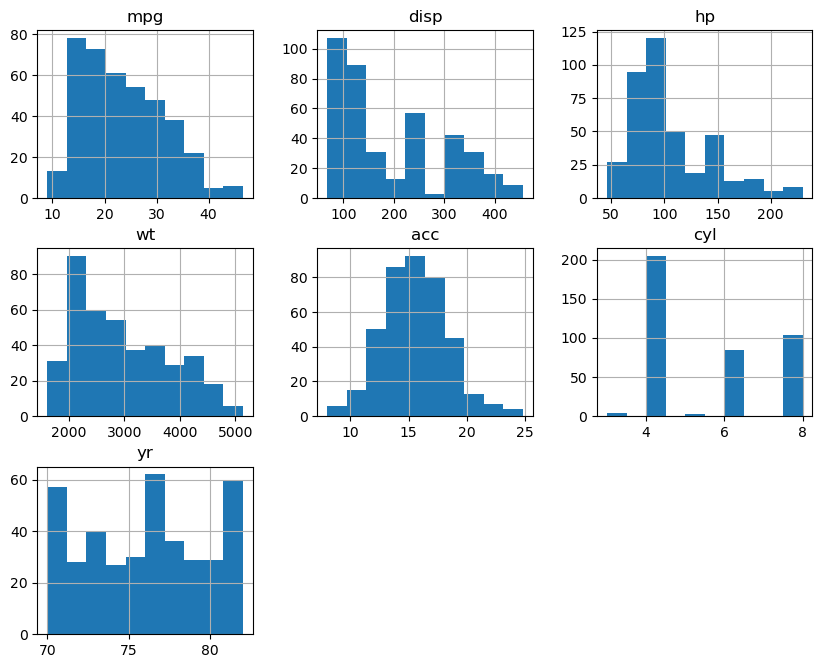

In [65]:
# Distribution for continous variables
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (10, 8)
df[["mpg", "disp", "hp", "wt", "acc", "cyl", "yr"]].hist()
plt.show()

Displacement , hp and weight there is a skewness in the data and accelaration is normally distributed

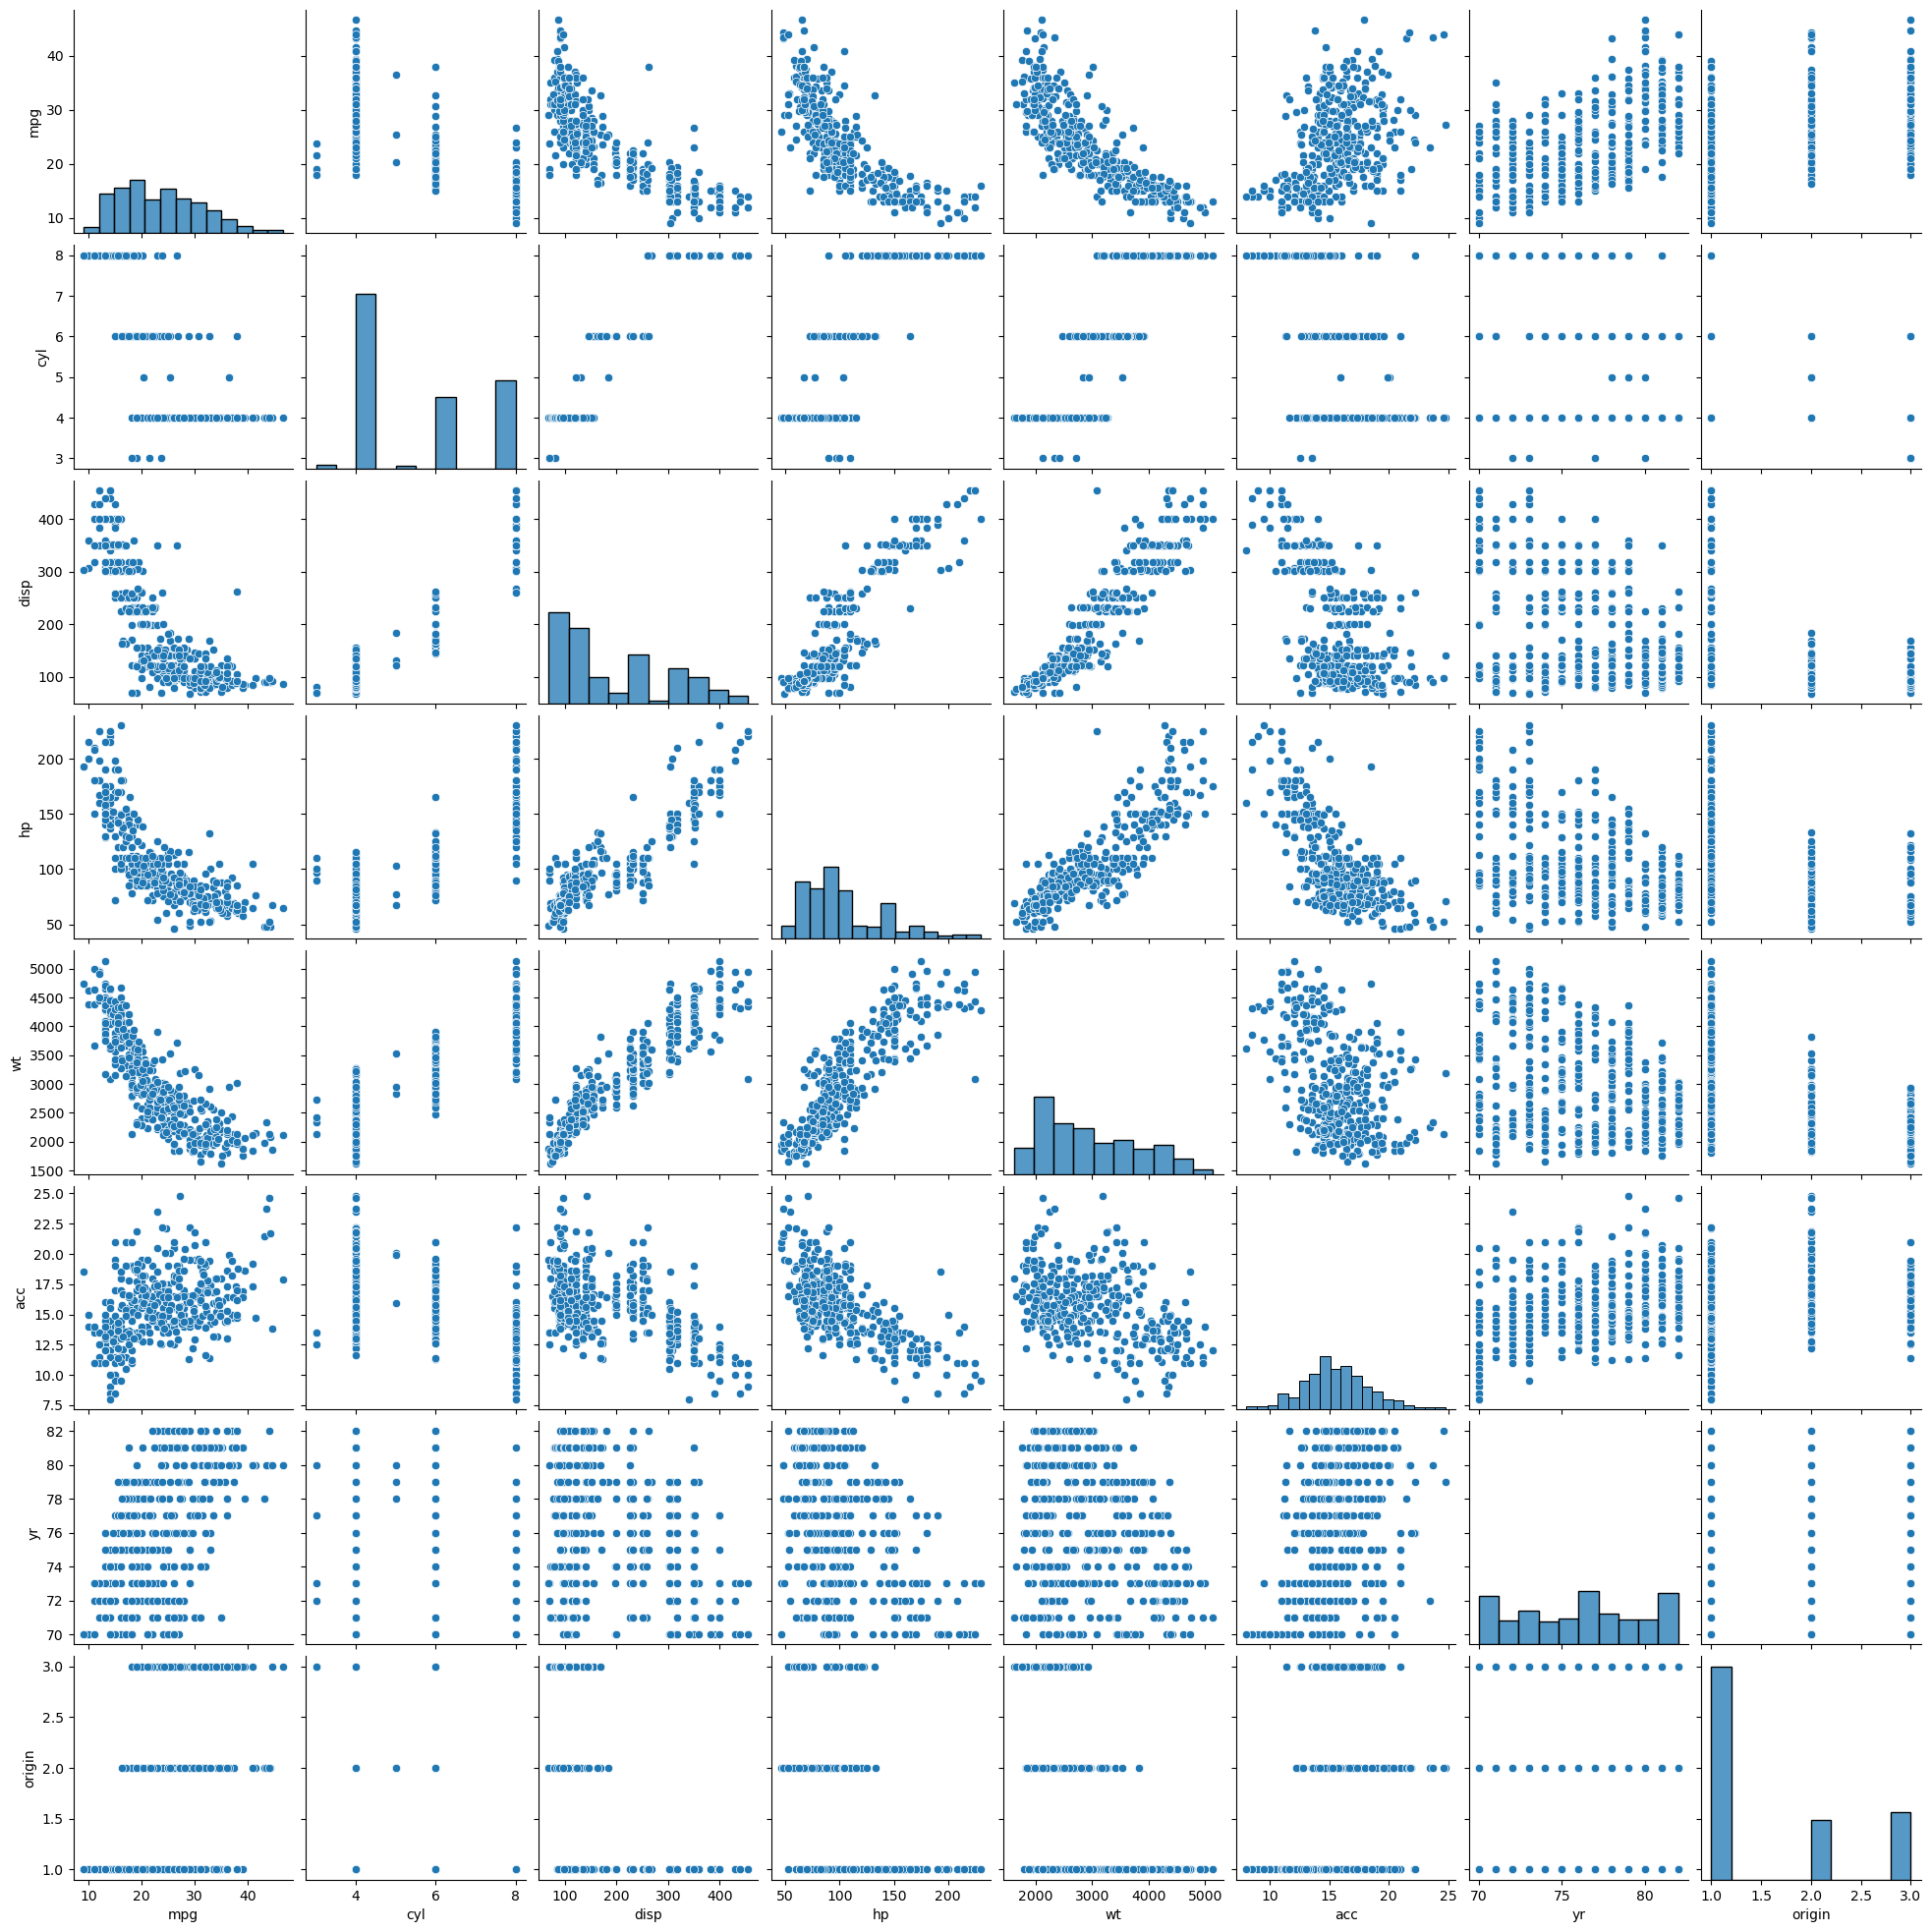

In [66]:
# Pairplot
sns.pairplot(df)
plt.show()

# Origin

Text(0.5, 1.0, 'Origin Distribution')

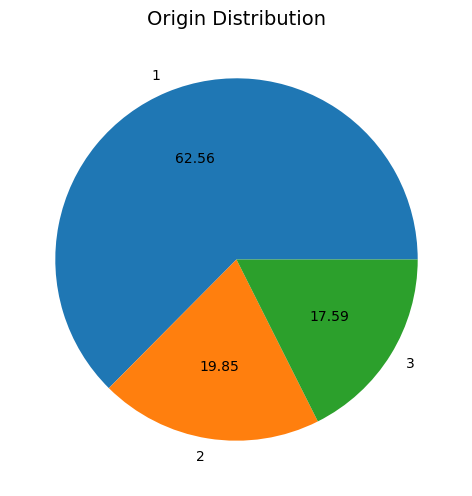

In [67]:
plt.figure(figsize=[14, 6])
plt.pie(x=df["origin"].value_counts(), autopct="%.2f", labels=["1", "2", "3"])
plt.title("Origin Distribution", fontsize=14)

1.62 % of Cars belongs to origin 1

2.20 % of Cars belongs to origin 2

3.18 % of Cars belongs to origin 3

<AxesSubplot:xlabel='origin', ylabel='mpg'>

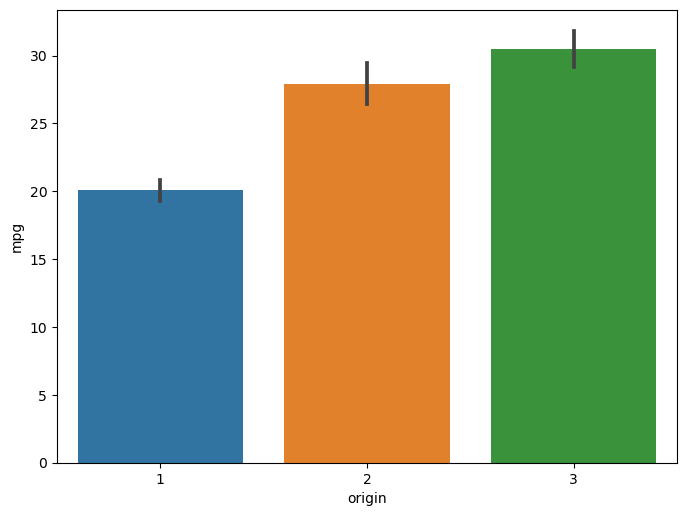

<IPython.core.display.Javascript object>

In [267]:
plt.figure(figsize=[8, 6])
sns.barplot(x="origin", y="mpg", data=df)

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

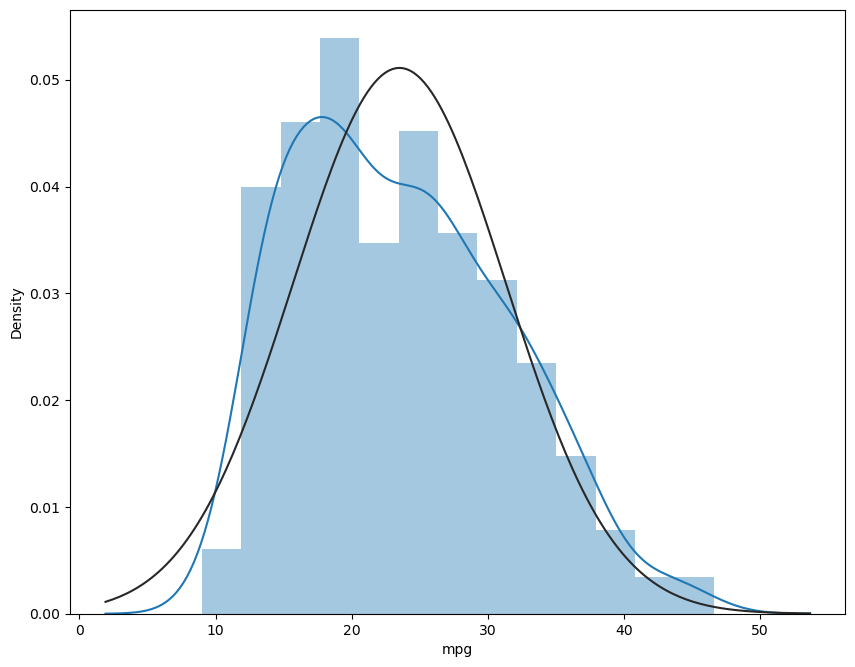

In [68]:
sns.distplot(df["mpg"], fit=norm)

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


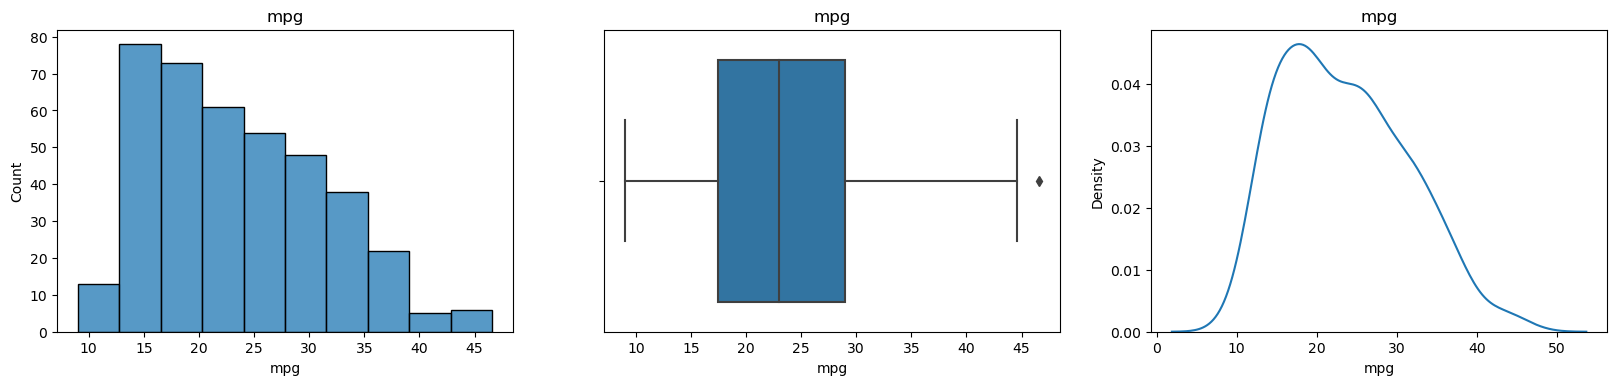

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


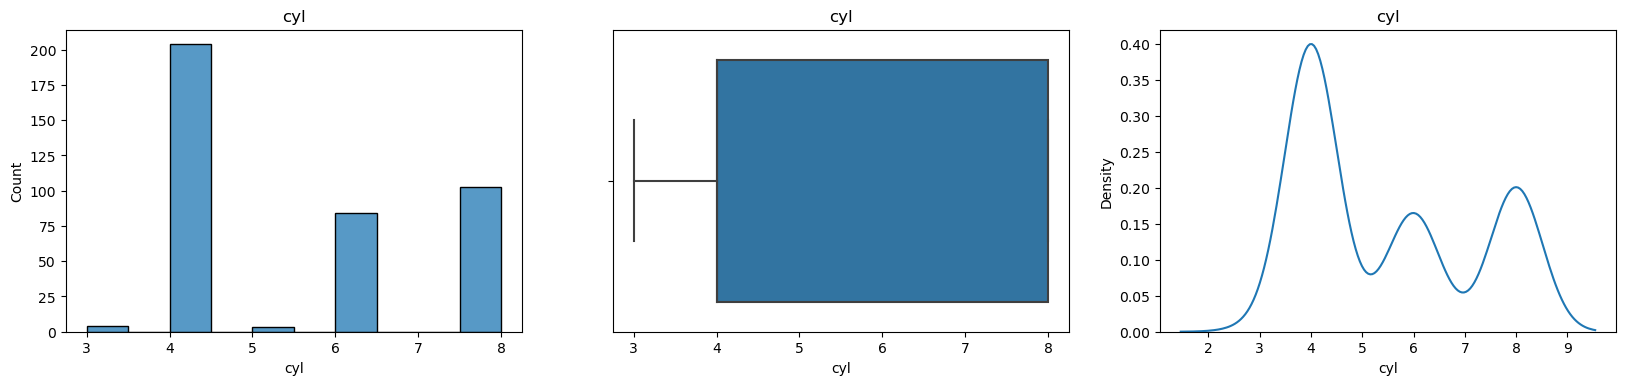

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


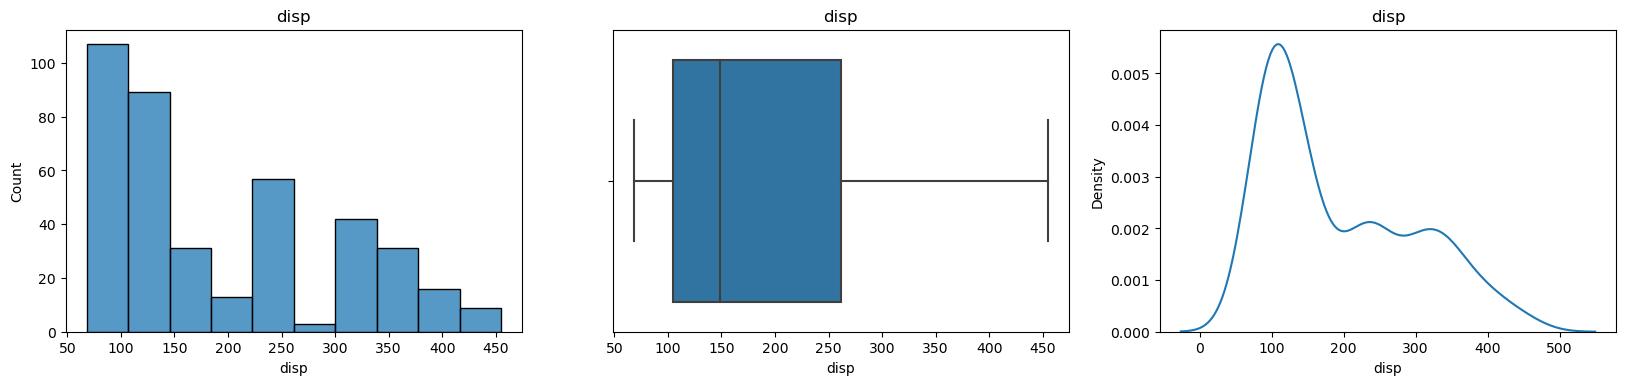

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


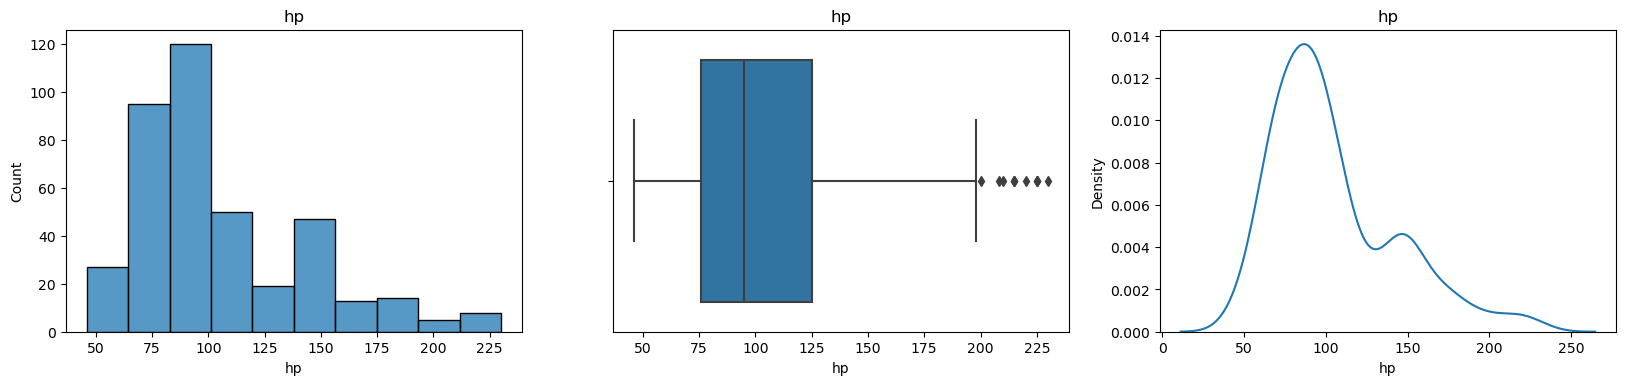

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


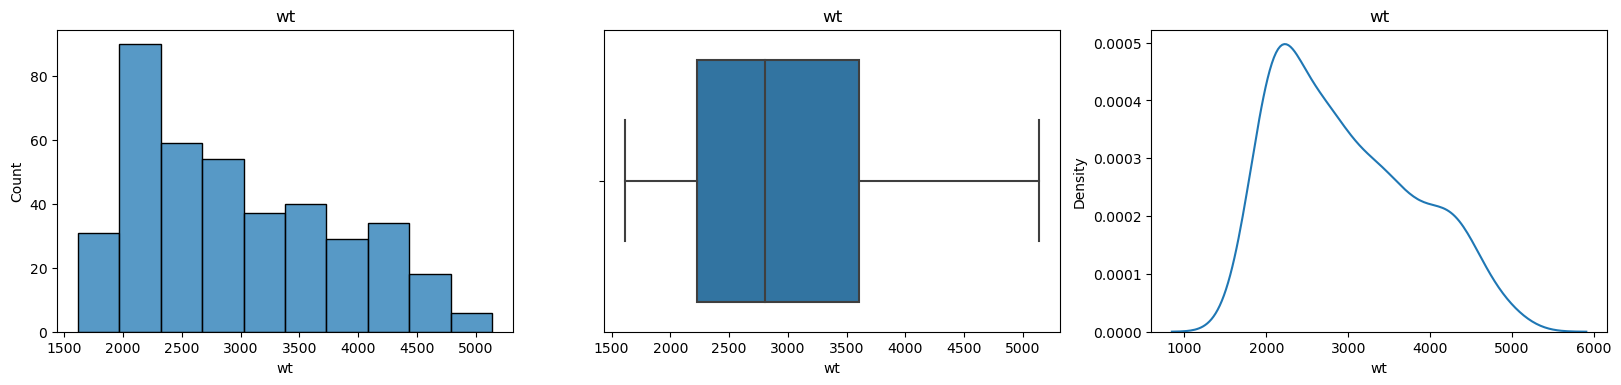

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


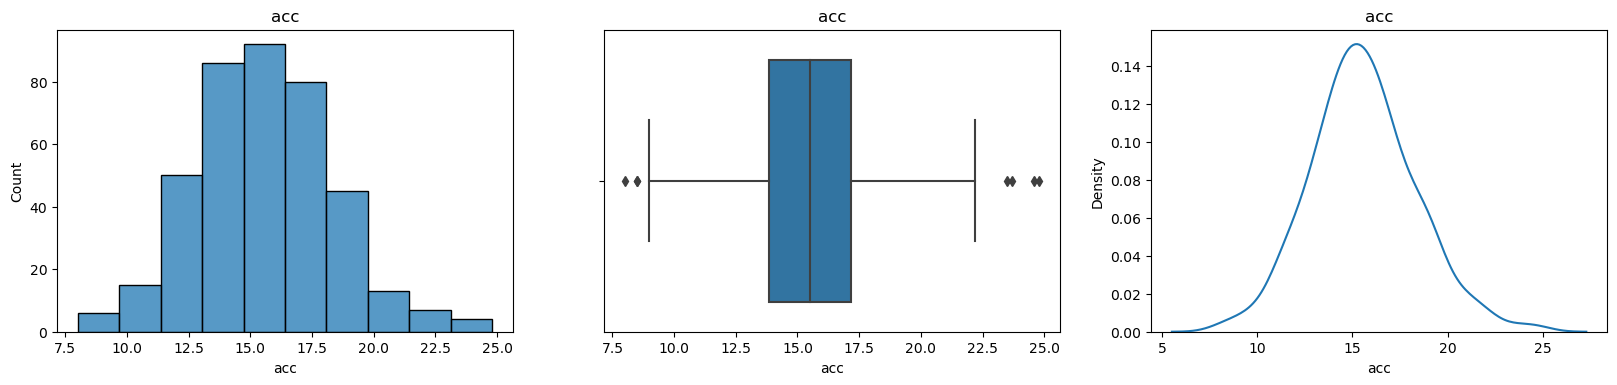

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


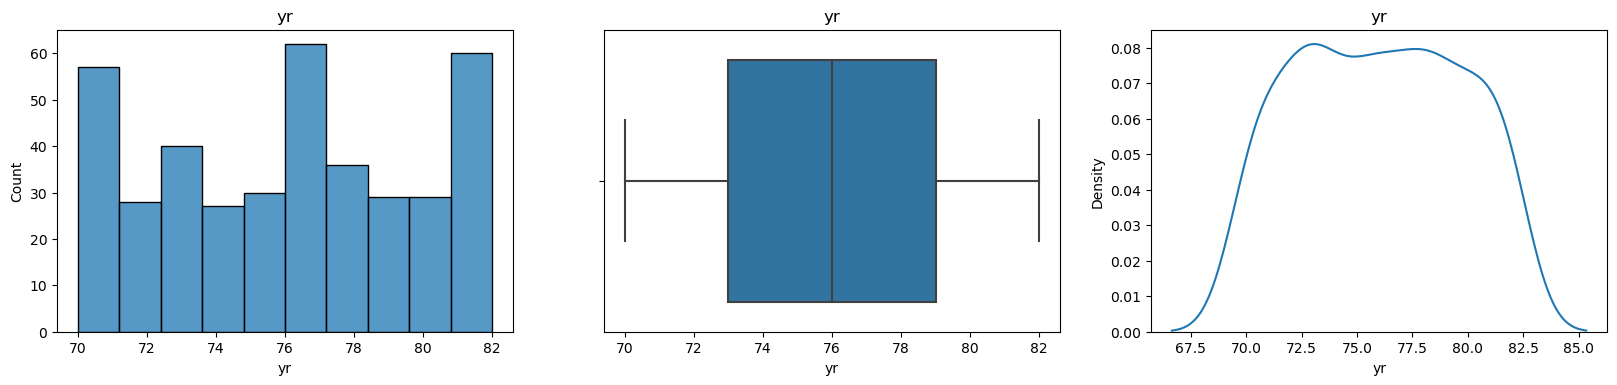

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


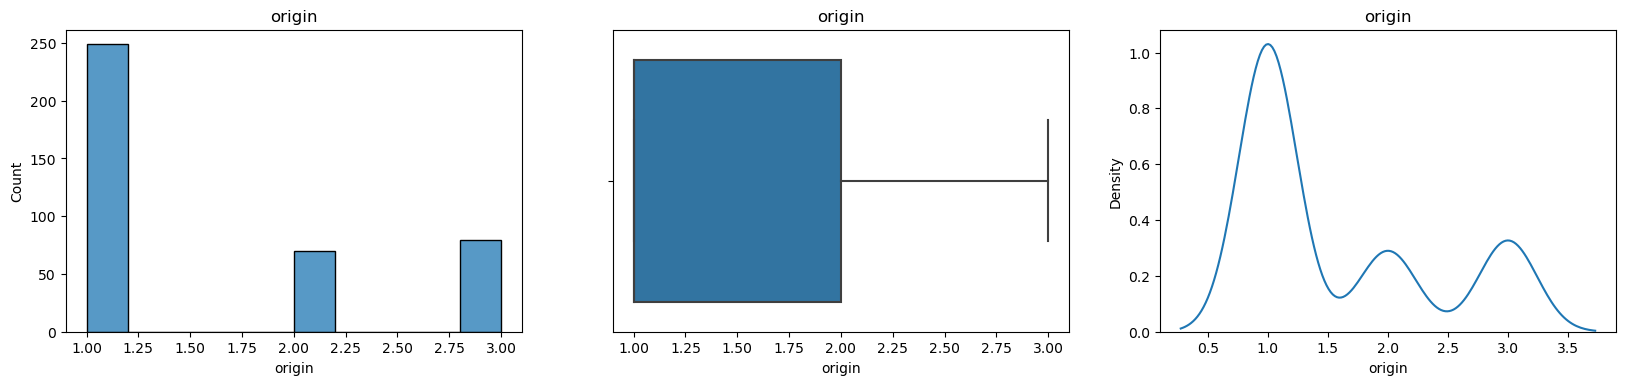

<IPython.core.display.Javascript object>

In [269]:
for i in df._get_numeric_data().columns:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
    sns.histplot(df[i], bins=10, ax=axes[0])
    axes[0].set_title(i)

    sns.boxplot(df[i], ax=axes[1])
    axes[1].set_title(i)

    sns.kdeplot(df[i], ax=axes[2])
    axes[2].set_title(i)
    plt.show()

# Outlier Treatment

In [109]:
#replacing outliers with IQR (Q1 and Q3 +-1.5*IQR)
IQR1 = stats.iqr(df['hp'], interpolation = 'midpoint')
IQR2 = stats.iqr(df['acc'], interpolation = 'midpoint')

In [115]:
#horse power after imputing outliers
Q3 = df['hp'].quantile(0.75)
df['hp'] = np.where(df["hp"] >(Q3+1.5*IQR1), 198.5,df['hp'])

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


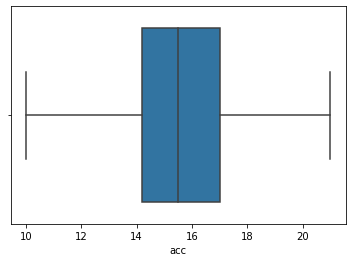

In [114]:
#accelaration after imputing outliers
Q31=df['acc'].quantile(0.75)
df['acc'] = np.where(df["acc"] >(Q31+1.5*IQR2),22.10 ,df['acc'])
sns.boxplot(df['acc']);

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

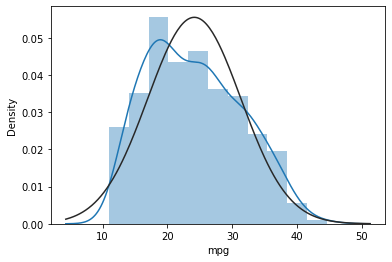

In [117]:
sns.distplot(df["mpg"], fit=norm)

In [118]:
#separating numeric variables
df1 = df.iloc[:,0:7] 
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,70.8,3504,12.0,70
1,15.0,8,350.0,70.8,3693,11.5,70
2,18.0,8,318.0,70.8,3436,11.0,70
3,16.0,8,304.0,70.8,3433,12.0,70
4,17.0,8,302.0,70.8,3449,10.5,70


# Scaling

In [126]:
# Scaling the data
from scipy.stats import zscore
df_scale = df1.apply(zscore)
df_scale.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.854660,1.727764,1.457248,-0.613622,0.864703,-1.660529,-1.73969
1,-1.271884,1.727764,1.941387,-0.613622,1.115520,-1.884103,-1.73969
2,-0.854660,1.727764,1.581097,-0.613622,0.774462,-2.107678,-1.73969
3,-1.132809,1.727764,1.423471,-0.613622,0.770481,-1.660529,-1.73969
4,-0.993735,1.727764,1.400953,-0.613622,0.791714,-2.331252,-1.73969


# Heirarchial Clustering

In [127]:
#calculating pairwise distance using average linkage method
from scipy.cluster.hierarchy import dendrogram, linkage
link_method = linkage(df_scale.iloc[:,0:7], method = 'average')

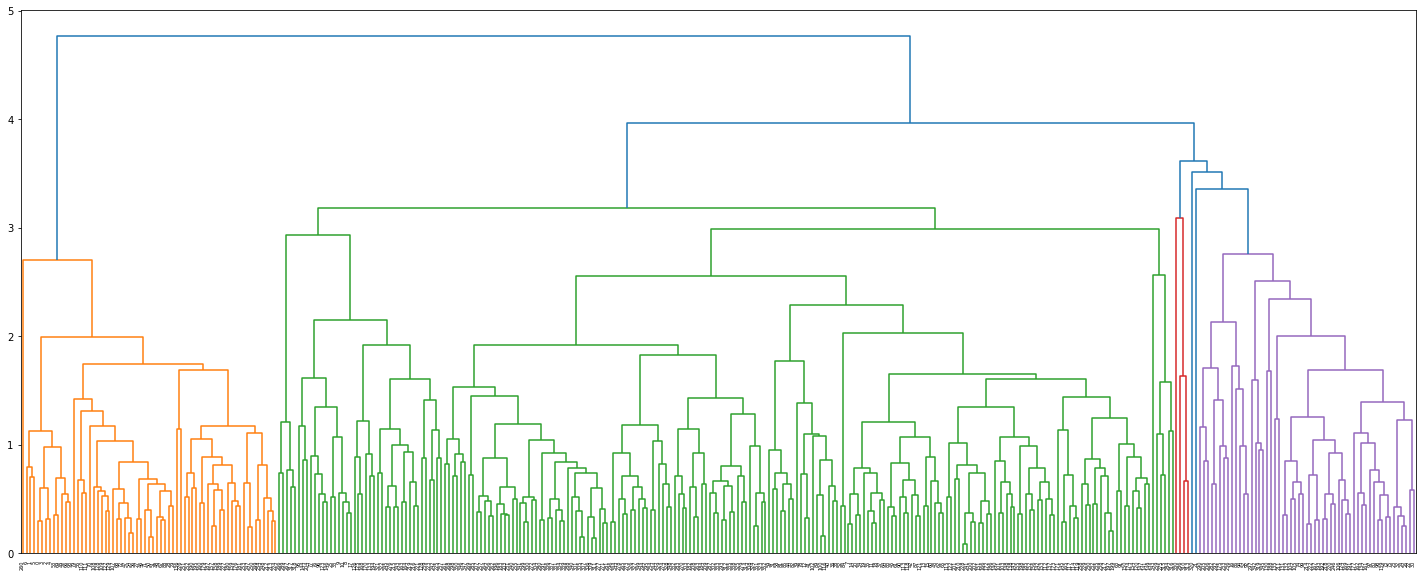

In [125]:
# Hierarchial Clustering with Link method
plt.figure(figsize=(25, 10))
dendrogram(link_method)
plt.show()

In [130]:
#vieweing the clusters formed
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [138]:
#attaching the clusters formed to the data
df['clusters'] = clusters
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,mpg_level,clusters
0,18.0,8,307.0,70.8,3504,12.0,70,1,medium,1
1,15.0,8,350.0,70.8,3693,11.5,70,1,low,1
2,18.0,8,318.0,70.8,3436,11.0,70,1,medium,1
3,16.0,8,304.0,70.8,3433,12.0,70,1,low,1
4,17.0,8,302.0,70.8,3449,10.5,70,1,medium,1


In [139]:
#vieweing the distribution of clusters
df.clusters.value_counts().sort_index()

1     65
2    288
Name: clusters, dtype: int64

# K Means Clustering

In [141]:
#seperating the numeric values
df1 = df.iloc[:,0:7] 
df2 = df1.apply(zscore)
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.854660,1.727764,1.457248,-0.613622,0.864703,-1.660529,-1.73969
1,-1.271884,1.727764,1.941387,-0.613622,1.115520,-1.884103,-1.73969
2,-0.854660,1.727764,1.581097,-0.613622,0.774462,-2.107678,-1.73969
3,-1.132809,1.727764,1.423471,-0.613622,0.770481,-1.660529,-1.73969
4,-0.993735,1.727764,1.400953,-0.613622,0.791714,-2.331252,-1.73969


In [143]:
#calculating within sum of squares
wss =[] 
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(df2)
    wss.append(KM.inertia_)
wss

C:\Users\srikanthve\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[2470.999999999997, 1395.1115322459204, 1034.4315136472446, 828.5511123734577]

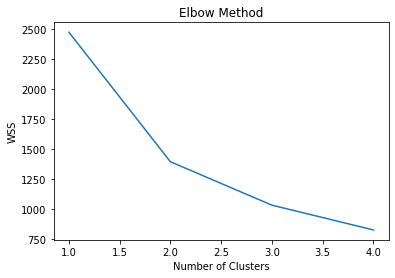

In [144]:
#plotting the WSS against the number of cluster to come up with optimal number of clusters using Elbow-method
plt.plot(range(1,5), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [145]:
#using 2 centroids for clustering
k_means = KMeans(n_clusters = 2)
k_means.fit(df2)
labels = k_means.labels_

In [148]:
# Calculating silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(df2,labels)

0.39332663014565233

In [150]:
#calculating silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df2)
    score = silhouette_score(df2,kmeans.labels_)
    silhouette_coefficients.append(score)

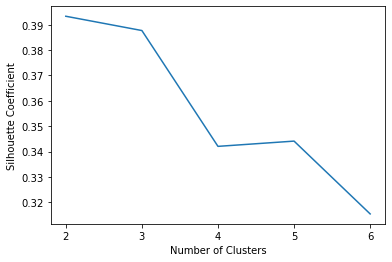

In [151]:
#plotting silhouette score for different centroids
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [153]:
#attaching the clusters formed to the data
df2['clusters'] = clusters
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,clusters
0,-0.854660,1.727764,1.457248,-0.613622,0.864703,-1.660529,-1.73969,1
1,-1.271884,1.727764,1.941387,-0.613622,1.115520,-1.884103,-1.73969,1
2,-0.854660,1.727764,1.581097,-0.613622,0.774462,-2.107678,-1.73969,1
3,-1.132809,1.727764,1.423471,-0.613622,0.770481,-1.660529,-1.73969,1
4,-0.993735,1.727764,1.400953,-0.613622,0.791714,-2.331252,-1.73969,1


In [154]:
df2.clusters.value_counts().sort_index()

1     65
2    288
Name: clusters, dtype: int64

# Linear regression

In [172]:
#Segregate predictors vs target attributes
X = df.drop(['mpg','origin','mpg_level'], axis=1)
y = df['mpg']

In [173]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [196]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [203]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [204]:
print('Coefficients: ', regr.coef_)

Coefficients:  [ 0.13823077 -0.00956997 -0.00720762 -0.0071717   0.12099783  0.75634464
 -2.49901834]


In [206]:
print('Intercept: ', regr.intercept_)

Intercept:  -8.778973667185575


In [226]:
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]

In [227]:
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [228]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

In [229]:
#Evaluation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

In [238]:
# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)

In [231]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  7.40421495940312
R square obtain for normal equation method is : 0.8492962562167178


K-means appears to explain the highest variation in the datset, 
to get more clarity a larger dataset should be used

quality - Improve the quality of the data through ensuring the zero missing data and establishing the critical data capturing

quantity - Increase the sample size which is aligned to the near population

variety - Identify of key factors through the data structuring and stratification/segmentation

velocity- Need to re-define data quality metrics so that they are relevant as well as feasible in the real-time context.

veracity- Data source and the data use should be properly aligned